# Project 5: **Build a Multi-Modal Generation Agent**

Welcome to the final project! In this project, you'll use open-source text-to-image and text-to-video models to generate content. Next, you'll build a **unified multi-modal agent** similar to modern chatbots, where a single agent can support general questions, image generation, and video generation requests.

By the end of this project, you'll understand how to integrate multiple model types under one  routing system capable of deciding what modality to use based on the user's intent.



## Learning Objectives

* Use **Text-to-Image** models to generate images from a text.
* Generate short clips with a **Text-to-Video** model
* Build a **Multi-Modal Agent** that answers questions and routes media requests
* Build a simple **Gradio** UI and interact with the multi-modal agent

## Roadmap
1. Environment setup
2. Text‑to‑Image
3. Text‑to‑Video
4. Multimodal Agent
5. Gradio UI
6. Celebrate

## 1 - Environment Setup

In this project, we'll use open-source Text-to-Image and Text-to-Video models to generate visuals from natural-language prompts. These models are computationally heavy and perform best on GPUs, so we recommend running this notebook in Google Colab or another GPU-enabled environment. We'll load all models from Hugging Face, which requires authentication.

Before continuing:
1. Open this project in Google Colab. [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/bytebyteai/ai-eng-projects/blob/main/project_5/multimodal_agent_solution.ipynb)
2. Create a Hugging Face account and generate an access token at huggingface.co/settings/tokens
3. Paste your token in the field below to log in.
4. In the Colab environment, enable GPU acceleration by selecting Runtime → Change runtime type → GPU.

In [ ]:
from huggingface_hub import login

login(token="YOUR TOKEN HERE")

Let's import the required libraries and confirm that PyTorch can detect the available GPU.

In [2]:
import torch, diffusers, transformers, os, random, gc
print('torch', torch.__version__, '| CUDA:', torch.cuda.is_available())

torch 2.8.0+cu126 | CUDA: True


## 2 - Text-to-Image (T2I)
T2I models translate natural-language descriptions into images. They are typically based on diffusion models, which gradually refine random noise into a coherent picture guided by the text prompt. In this section, you'll load and test one such model to generate images directly from text inputs.

### 2.1: Load a T2I Model
We'll use `Stable Diffusion XL` (SDXL) by `Stability AI`, one of the open-source diffusion models. It provides high-quality, detailed image generation with relatively efficient inference compared to earlier versions.

You'll load the model from Hugging Face using the diffusers library, which simplifies running diffusion-based pipelines. To learn more about diffusers, read: https://huggingface.co/docs/diffusers/main/index


In [3]:
from diffusers import DiffusionPipeline
# Define the Stable Diffusion XL model ID from Hugging Face and load the pre-trained model
"""
YOUR CODE HERE (~2-5 lines of code)
"""

model_id = 'stabilityai/stable-diffusion-xl-base-1.0'
pipe_img = DiffusionPipeline.from_pretrained(model_id, dtype=torch.float16, variant='fp16')\
    .to('cuda' if torch.cuda.is_available() else 'cpu')
pipe_img.enable_attention_slicing()

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

text_encoder/model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

text_encoder_2/model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.fp16.safete(…):   0%|          | 0.00/5.14G [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

vae/diffusion_pytorch_model.fp16.safeten(…):   0%|          | 0.00/167M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

vae_1_0/diffusion_pytorch_model.fp16.saf(…):   0%|          | 0.00/167M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


### 2.2: Generate an image

  0%|          | 0/50 [00:00<?, ?it/s]

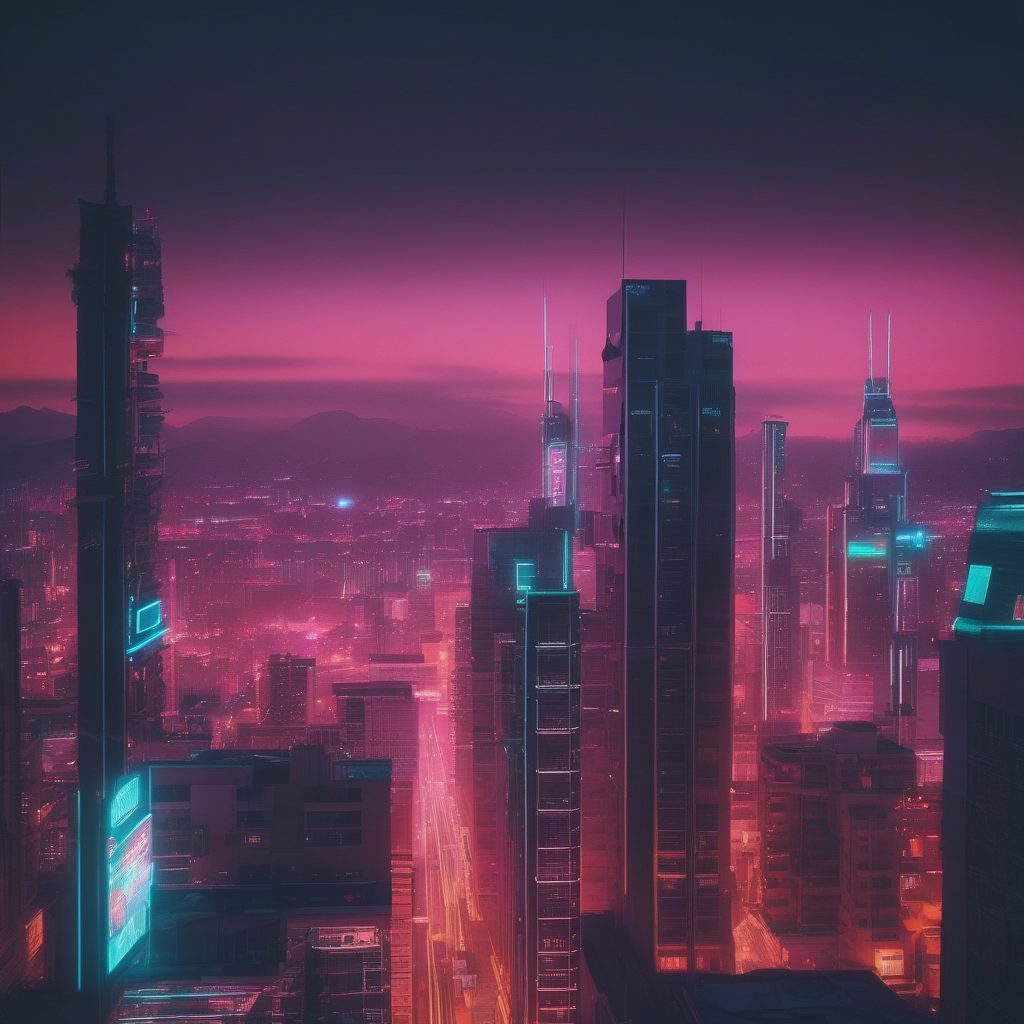

In [4]:
# Generate and display an image from a text prompt using the loaded pipeline
"""
YOUR CODE HERE (~2 lines of code)
"""

prompt = 'cinematic photograph of a futuristic neon cityscape at dusk, 35mm lens'
image = pipe_img(prompt).images[0]
image

### 2.3: Experimenting with "inference_steps"

The number of inference steps determines how many refinement passes the diffusion model makes. Fewer steps give quicker but less detailed images, while more steps improve clarity and structure at the cost of speed.

Try generating images with different step counts and compare the results.

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

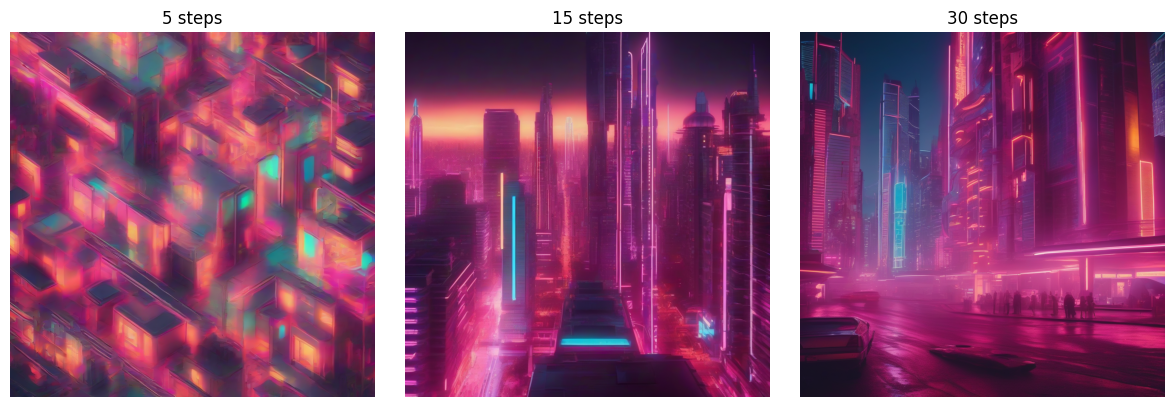

In [5]:
import matplotlib.pyplot as plt

# Generate an image for different values of num_inference_steps (e.g., 10, 25, 50) and compare sharpness and detail
images = []

"""
YOUR CODE HERE (~6-8 lines)
"""

prompt = "cinematic photograph of a futuristic neon cityscape at dusk, 35mm lens"
steps_list = [5, 15, 30]  # try changing these values

for steps in steps_list:
    image = pipe_img(prompt=prompt, num_inference_steps=steps, guidance_scale=7.5).images[0]
    images.append((steps, image))

# Plot results side-by-side
plt.figure(figsize=(12, 4))
for i, (steps, img) in enumerate(images, 1):
    plt.subplot(1, len(images), i)
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"{steps} steps")
plt.tight_layout()
plt.show()


### 2.4 (Optional): Visualizing the Diffusion Process
Diffusion models start from random noise and iteratively refine it into an image that matches the prompt. If you are curious, visualize all intermediate steps to see how the noise gradually turns into a coherent picture.

In [ ]:
import torch
import matplotlib.pyplot as plt

# Step 1: Run the pipeline with 50 inference steps
# Step 2: Capture intermediate latents or images during generation
# Step 3: Plot them sequentially to show noise evolving into structure
"""
YOUR CODE HERE (~10-12 lines)
"""

### 2.5 (Optional): Experiment with other models.
Different text-to-image models vary in speed, style, and visual quality. Try swapping in other open-source diffusion models and compare how their outputs differ in detail, realism, or artistic tone.

You can browse available models on Hugging Face here: https://huggingface.co/models?library=diffusers

In [ ]:
# Step 1: Replace model_id with another text-to-image model from Hugging Face
# Step 2: Reload the pipeline and generate a few test images
# Step 3: Compare image quality, color balance, and prompt fidelity
"""
YOUR CODE HERE
"""

## 3 - Text-to-Video (T2V)
T2V models extend the idea of diffusion from still images to moving sequences. Instead of generating one frame, they create a series of coherent frames that depict motion consistent with the text prompt. These models are computationally heavier and often generate short clips (typically 2-10 seconds).

In this section, you'll load an open-source video diffusion model and prepare it for generation.

### 3.1: Load a T2V model

We'll use the model `damo-vilab/text-to-video-ms-1.7b`, which can produce short video clips from text prompts. This model benefits from a specialized scheduler (DPMSolverMultistepScheduler) that improves stability and speed during sampling.

In [6]:
from diffusers import DiffusionPipeline, DPMSolverMultistepScheduler

video_model_id = 'damo-vilab/text-to-video-ms-1.7b'

# Load the model with FP16 precision for efficiency
"""
YOUR CODE HERE (~2 lines of code)
"""
pipe_vid = DiffusionPipeline.from_pretrained(video_model_id, dtype=torch.float16, variant="fp16")
pipe_vid.scheduler = DPMSolverMultistepScheduler.from_config(pipe_vid.scheduler.config)
pipe_vid.enable_model_cpu_offload()

model_index.json:   0%|          | 0.00/384 [00:00<?, ?B/s]

Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

text_encoder/model.fp16.safetensors:   0%|          | 0.00/681M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/644 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/787 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/755 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

scheduler_config.json:   0%|          | 0.00/465 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.fp16.safete(…):   0%|          | 0.00/2.82G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.fp16.safeten(…):   0%|          | 0.00/167M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/657 [00:00<?, ?B/s]

Keyword arguments {'dtype': torch.float16} are not expected by TextToVideoSDPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

The TextToVideoSDPipeline has been deprecated and will not receive bug fixes or feature updates after Diffusers version 0.33.1. 


### 3.2: Generate a clip
Create a short video clip from a text prompt using a text-to-video model.

In [7]:
# Step 1: Write a text prompt describing the video you want to generate
# Step 2: Run the text-to-video pipeline with your chosen prompt
"""
YOUR CODE HERE (~2-3 lines)
"""

prompt = "astronaut walking on Mars at sunrise"
vid_frames = pipe_vid(prompt, num_frames=16, num_inference_steps=25).frames[0]
print(vid_frames.shape)

  0%|          | 0/25 [00:00<?, ?it/s]

(16, 256, 256, 3)


### 3.3: Frame inspection
Inspect a single frame to sanity-check colors, resolution, and subject positioning before writing a full video.

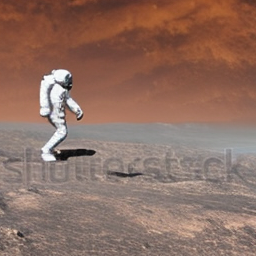

In [ ]:
import numpy as np
from PIL import Image

# Step 1: Select one frame from vid_frames (e.g., index 0)
# Step 2: Convert float [0,1] frame to uint8 [0,255]
# Step 3: Display as a PIL image
"""
YOUR CODE HERE (~1-3 lines)
"""

Image.fromarray((vid_frames[0]*255).astype(np.uint8))

### 3.4: Convert frames to MP4
Write the generated frames to an MP4 file so you can preview and share the result.

In [ ]:
# Step 1: Use diffusers.utils.export_to_video to write vid_frames to an MP4
# Step 2: Capture and print the saved video path
"""
YOUR CODE HERE (~3-4 lines)
"""

from diffusers.utils import export_to_video
video_path = export_to_video(vid_frames)
video_path

'/tmp/tmpljfj09k_.mp4'

### 3.5: Video inspection
Play the saved video inside the notebook to check motion and temporal consistency.

In [10]:
# Display the saved MP4 inline
from IPython.display import Video

"""
YOUR CODE HERE (1 line of code)
"""

Video(video_path, embed=True)

### 3.6 (Optional): Experiment with different configs
Increase `num_frames` or decrease `num_inference_steps` to experiment with clip length versus quality.

## 4 - Multimodal Generation Agent
Now that you have text-to-image, text-to-video, and basic LLM question answering, you will build a single agent that routes user requests to the right capability. The agent will read a prompt, infer intent (chat vs image vs video), and return the appropriate output.

### 4.1: Load an LLM for generic queries
Use a small LLM as the default chat brain. We will start with `gemma-3-1b-it` and keep the loading logic simple. You can swap to another compact chat model later.

In [11]:
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline
import torch, textwrap, json, re

# Load google/gemma-3-1b-it using Hugging Face

"""
YOUR CODE HERE (~2-15 lines)
"""

model_id = "google/gemma-3-1b-it"

tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForCausalLM.from_pretrained(
    model_id,
    dtype=torch.float16 if torch.cuda.is_available() else torch.float32,
    device_map="auto",
)
gemma_llm = pipeline("text-generation", model=model, tokenizer=tokenizer)

tokenizer_config.json:   0%|          | 0.00/1.16M [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.69M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/33.4M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/35.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/662 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/899 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.00G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/215 [00:00<?, ?B/s]

Device set to use cuda:0


### 4.2: Build a routing mechanism to route requests

In [12]:
def generate_media(prompt: str, mode: str):
    # Produce either an image or a short video clip from a text prompt.
    """
    YOUR CODE HERE (~3-6 lines)
    """
    pass

    if mode == 'image':
        return pipe_img(prompt).images[0]
    else:
        frames = pipe_vid(prompt, num_frames=16, num_inference_steps=25).frames
        return frames[0]

def llm_generate(prompt, max_new_tokens=64, temperature=0.7):
    # Return a response to the prompt with the loaded gemma
    """
    YOUR CODE HERE (~2 lines of code)
    """

    outputs = gemma_llm(prompt, max_new_tokens=max_new_tokens, do_sample=True, temperature=temperature)
    return outputs[0][0]["generated_text"][-1]["content"]

In [15]:
def classify_prompt(prompt: str):
    """Classify the user prompt into QA, image, or video."""

    # Step 1: Define a system prompt explaining how to classify requests (qa, image, video)
    # Step 2: Format the user message and system message as input to the LLM
    # Step 3: Generate a response with llm_generate() and parse it using regex
    # Step 4: Extract fields "type" and "expanded_prompt" from the LLM response
    # Step 5: Return a dict with classification results or default to {"type": "qa"} on failure

    """
    YOUR CODE HERE (~5-25 lines of code)
    """

    system = textwrap.dedent("""You are a routing assistant for a multimodal generation system.
        Decide whether the USER request is:
          • a factual or conversational question  →  type = "qa"
          • an IMAGE generation request          →  type = "image"
          • a VIDEO generation request           →  type = "video"
        If it is for image or video, produce an improved, vivid, detailed `expanded_prompt`.
        Respond ONLY in this format: {"type": "...", "expanded_prompt": "..."}
    """)

    messages = [
      [
          {
              "role": "system",
              "content": [{"type": "text", "text": system},]
          },
          {
              "role": "user",
              "content": [{"type": "text", "text": prompt},]
          },
      ],
    ]
    response = llm_generate(messages, temperature=0.2)
    match = re.search(r'"type"\s*:\s*"([^"]+)"\s*,\s*"expanded_prompt"\s*:\s*"([^"]+)', response)
    if match:
        try:
            result = {
              "type": match.group(1),
              "expanded_prompt": match.group(2)
            }
            return result
        except Exception:
            pass
    # fallback
    return {"type": "qa"}

### 4.3: Build the multimodal agent
This agent takes a single user prompt, sends it to the `classify_prompt` to determine what kind of task it is, and then calls the appropriate module:
- QA: use the chat LLM to generate an answer
- Image: use the text-to-image generator
- Video: use the text-to-video generator

Start with a simple version first. You can improve it later by adding better prompts, guardrails, and citation handling.

In [18]:
def multimodal_agent(user_prompt: str):
    # Step 1: Classify the request
    # Step 2: Route the prompt and generate output

    """
    YOUR CODE HERE (~12-16 lines)
    """

    decision = classify_prompt(user_prompt)
    kind = decision.get('type', 'qa')
    if kind == 'qa':
        system = "You are a helpful assistant."
        messages = [
            [
                {
                    "role": "system",
                    "content": [{"type": "text", "text": system},]
                },
                {
                    "role": "user",
                    "content": [{"type": "text", "text": user_prompt},]
                },
            ],
        ]
        return llm_generate(messages)
    else:
        return generate_media(decision['expanded_prompt'], mode=kind)

### 4.4: Test the agent
Now let's test your multimodal agent end to end. Each prompt will automatically be routed to the correct capability: text Q&A, image generation, or video generation, and display the corresponding output.


PROMPT: What's the capital of Iceland?
The capital of Iceland is Reykjavík! 😊 

Do you want to know anything else about Reykjavík or Iceland?


  0%|          | 0/50 [00:00<?, ?it/s]


PROMPT: Generate an image of a neon dragon flying over Tokyo at night


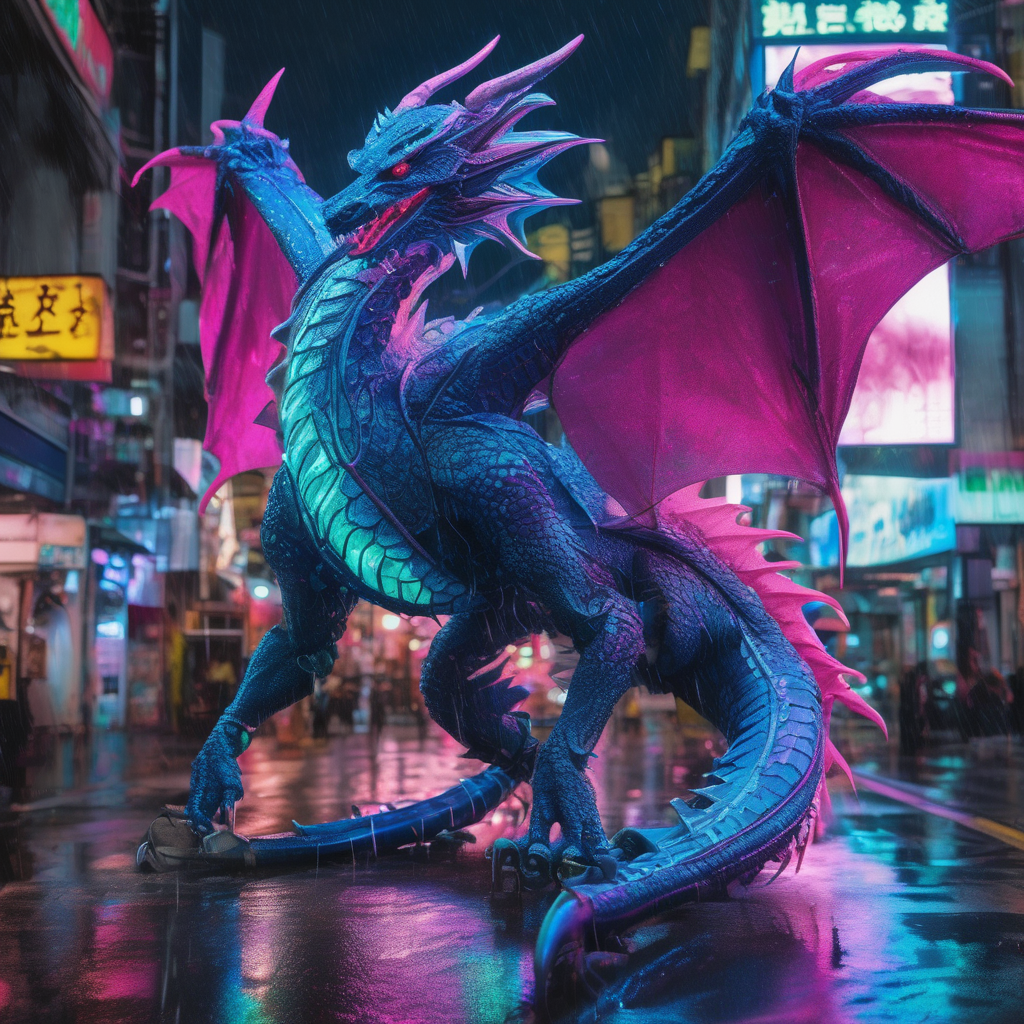

  0%|          | 0/25 [00:00<?, ?it/s]

OutOfMemoryError: CUDA out of memory. Tried to allocate 64.00 MiB. GPU 0 has a total capacity of 14.74 GiB of which 22.12 MiB is free. Process 15640 has 14.72 GiB memory in use. Of the allocated memory 14.24 GiB is allocated by PyTorch, and 357.65 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [19]:
from diffusers.utils import export_to_video
from IPython.display import display, Video

# Step 1: Define a few diverse prompts (QA, image, video)
# Step 2: For each prompt, call multimodal_agent and inspect the returned result
"""
YOUR CODE HERE (~15-18 lines)
"""

for p in [
    "What's the capital of Iceland?",
    "Generate an image of a neon dragon flying over Tokyo at night",
    "Create a short video of a paper plane folding itself"
]:
    result = multimodal_agent(p)
    print('\nPROMPT:', p)
    if isinstance(result, str):
        print(result)
    else:
        if hasattr(result, 'save'):
            display(result)
        else:
            vid = export_to_video(result)
            print(f"video path: {vid}")
            display(Video(vid, embed=True))

Replace the sample queries with your own and verify that the agent chooses the correct generation path.

## 5 - Interactive Web UI

Launch a simple Gradio web interface so you (or your users) can play with the multimodal agent from the browser.


In [20]:
import gradio as gr
with gr.Blocks() as demo:
    gr.Markdown('# Multimodal Agent')
    inp = gr.Textbox(placeholder='Ask or create...')
    btn = gr.Button('Submit')
    out_text = gr.Markdown()
    out_img = gr.Image()
    out_vid = gr.Video()

    def handle(prompt):
        res = multimodal_agent(prompt)
        if isinstance(res, str):
            return res, None, None
        elif hasattr(res, 'save'):
            return '', res, None
        else:
            vid = export_to_video(res)
            return '', None, vid

    btn.click(handle, inp, [out_text, out_img, out_vid])

demo.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://cfd4aa3db2edcaea08.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


After the UI launches, open the link and generate your own images and videos directly from the browser.

## 🎉 Congratulations!

* You have built a **multi-modal agent** capable of understanding various requests, and routing them to the proper model.
* Try experimenting with other T2I and T2V models.
* Try making your system more efficient. For example, load a separate lightweight llm for routing, and a more capable llm for QA.


👏 **Great job!** Take a moment to celebrate. The techniques you implemented here power many production agents and chatbots.